## Logistic Regression

In this notebook, you'll learn about **logistic regression** and see how to fit a logistic regression model using the statsmodels library.

Logistic regression involves a **binary target variable**, meaning that it is a target which could be true or false. Our goal is to estimate the probability of the target being true, give the value of one or more **explanatory variables**. More precisely, we assume that the target variable follows a [Bernoulli distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution), conditional on the explanatory varaibles.

A Bernoulli distribution is determined by the probability of the target being true (or sometimes called the probability of "success"). With logistic regression, we assume that this probability of success can be estimated using a linear function of the explanatory variables. Specifically, if $x$ is our explanatory variable we assume

$$\text{logit}(p) = \beta_0 + \beta_1\cdot x$$

Here, 

$$\text{logit}(p) = \log(\frac{p}{1-p})$$

To convert to a probability, we can use the **logistic function**:

$$\text{logistic}(x) = \frac{1}{1 + e^{-x}}$$

Now, let's see how we can fit a logistic regression model using Python.

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

We'll look at a dataset containing the distance and result of all field goal kicks during the 2021 NFL season.

In [4]:
field_goals = pd.read_csv('../data/fg.csv')
field_goals.head(2)

,distance,kicker,result,target
0,31,M.Gay,Make,1
1,35,J.Myers,Miss,0


To fit a model for making a field goal (target = 1) based on distance, we can use the `logit` function.

In [6]:
fg_dist_logreg = smf.logit("target ~ distance",
                          data = field_goals).fit()

Optimization terminated successfully.
         Current function value: 0.329201
         Iterations 7


In [7]:
fg_dist_logreg.params

Intercept    6.992968
distance    -0.119864
dtype: float64

This says that 
$$\text{logit}(p) = 6.992968 - 0.119864\cdot\text{distance}$$

What does the model estimate is the probability of making a 40 yard field goal?

In [9]:
def logistic(x):
    return 1 / (1 + np.exp(-x))

In [10]:
distance = 40

logit_p = fg_dist_logreg.params['Intercept'] + fg_dist_logreg.params['distance']*distance

print(f'Estimated Probability of Make: {logistic(logit_p)}')

Estimated Probability of Make: 0.9001057566430011


What about a 60 yard field goal?

In [12]:
distance = 60

logit_p = fg_dist_logreg.params['Intercept'] + fg_dist_logreg.params['distance']*distance

print(f'Estimated Probability of Make: {logistic(logit_p)}')

Estimated Probability of Make: 0.4504422914972105


Let's plot the estimated probability of a make based on distance.

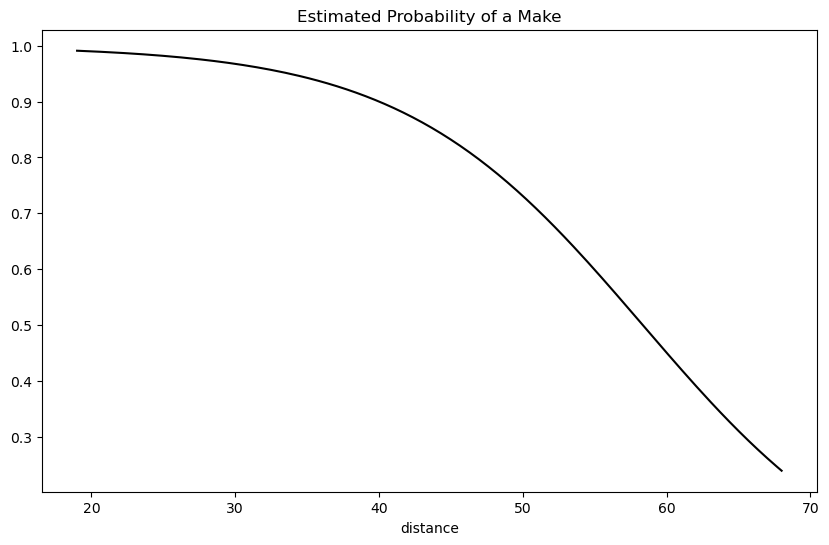

In [14]:
fit_df = pd.DataFrame({
    'distance': np.linspace(start = field_goals['distance'].min(),
                            stop = field_goals['distance'].max(),
                            num = 150)
})

fit_df['fit'] = fg_dist_logreg.predict(fit_df)

fit_df.plot(x = 'distance',
             y = 'fit',
             legend = False,
             figsize = (10,6),
             color = 'black',
            title = 'Estimated Probability of a Make');

Does this model explain the data well?

For this, we can look at some diagnostic plots.

First, let's make a summary table by dividing the 

In [34]:
fg_summary = (
    field_goals
    .assign(group = pd.qcut(field_goals['distance'], 
                            q = 10, 
                            duplicates = 'drop'))
    .groupby('group', observed = False)
    [['distance', 'target']]
    .mean()
    .reset_index()
    .rename(columns = {'target': 'eprob'})
)
fg_summary

,group,distance,eprob
0,"(18.999, 24.0]",22.283333,1.000000
1,"(24.0, 28.0]",26.537634,0.989247
2,"(28.0, 32.0]",30.476636,0.971963
3,"(32.0, 36.0]",34.671875,0.921875
4,"(36.0, 39.0]",37.946237,0.956989
5,"(39.0, 42.0]",41.022989,0.816092
6,"(42.0, 46.0]",44.531250,0.812500
7,"(46.0, 48.8]",47.615385,0.800000
8,"(48.8, 52.0]",50.695238,0.733333
9,"(52.0, 68.0]",55.316832,0.613861


In [76]:
fg_fifty_summary = (
    field_goals
    .assign(group = pd.qcut(field_goals['distance'], 
                            q = 50, 
                            duplicates = 'drop'))
    .groupby('group', observed = False)
    [['distance', 'target']]
    .mean()
    .reset_index()
    .rename(columns = {'target': 'eprob'})
)
fg_fifty_summary

,group,distance,eprob
0,"(18.999, 21.0]",20.578947,1.000000
1,"(21.0, 22.0]",22.000000,1.000000
2,"(22.0, 23.0]",23.000000,1.000000
3,"(23.0, 24.0]",24.000000,1.000000
4,"(24.0, 25.0]",25.000000,0.956522
5,"(25.0, 26.0]",26.000000,1.000000
6,"(26.0, 27.0]",27.000000,1.000000
7,"(27.0, 28.0]",28.000000,1.000000
8,"(28.0, 29.0]",29.000000,1.000000
9,"(29.0, 30.0]",30.000000,1.000000


In [78]:
fg_twenty_summary = (
    field_goals
    .assign(group = pd.qcut(field_goals['distance'], 
                            q = 50, 
                            duplicates = 'drop'))
    .groupby('group', observed = False)
    [['distance', 'target']]
    .mean()
    .reset_index()
    .rename(columns = {'target': 'eprob'})
)
fg_twenty_summary

,group,distance,eprob
0,"(18.999, 21.0]",20.578947,1.000000
1,"(21.0, 22.0]",22.000000,1.000000
2,"(22.0, 23.0]",23.000000,1.000000
3,"(23.0, 24.0]",24.000000,1.000000
4,"(24.0, 25.0]",25.000000,0.956522
5,"(25.0, 26.0]",26.000000,1.000000
6,"(26.0, 27.0]",27.000000,1.000000
7,"(27.0, 28.0]",28.000000,1.000000
8,"(28.0, 29.0]",29.000000,1.000000
9,"(29.0, 30.0]",30.000000,1.000000


In [80]:
fg_summary['fit_prob'] = fg_dist_logreg.predict(fg_summary[['distance']])
fg_summary

,group,distance,eprob,fit_prob,elogit,fit_logit
0,"(18.999, 24.0]",22.283333,1.000000,0.986900,inf,4.321994
1,"(24.0, 28.0]",26.537634,0.989247,0.978375,4.521789,3.812056
2,"(28.0, 32.0]",30.476636,0.971963,0.965773,3.545779,3.339911
3,"(32.0, 36.0]",34.671875,0.921875,0.944645,2.468100,2.837052
4,"(36.0, 39.0]",37.946237,0.956989,0.920164,3.102342,2.444573
5,"(39.0, 42.0]",41.022989,0.816092,0.888527,1.490091,2.075781
6,"(42.0, 46.0]",44.531250,0.812500,0.839601,1.466337,1.655266
7,"(46.0, 48.8]",47.615385,0.800000,0.783400,1.386294,1.285588
8,"(48.8, 52.0]",50.695238,0.733333,0.714313,1.011601,0.916424
9,"(52.0, 68.0]",55.316832,0.613861,0.589636,0.463573,0.362460


In [82]:
fg_fifty_summary['fit_prob'] = fg_dist_logreg.predict(fg_fifty_summary[['distance']])
fg_fifty_summary

,group,distance,eprob,fit_prob
0,"(18.999, 21.0]",20.578947,1.000000,0.989295
1,"(21.0, 22.0]",22.000000,1.000000,0.987332
2,"(22.0, 23.0]",23.000000,1.000000,0.985742
3,"(23.0, 24.0]",24.000000,1.000000,0.983956
4,"(24.0, 25.0]",25.000000,0.956522,0.981949
5,"(25.0, 26.0]",26.000000,1.000000,0.979697
6,"(26.0, 27.0]",27.000000,1.000000,0.977171
7,"(27.0, 28.0]",28.000000,1.000000,0.974339
8,"(28.0, 29.0]",29.000000,1.000000,0.971165
9,"(29.0, 30.0]",30.000000,1.000000,0.967612


In [84]:
fg_twenty_summary['fit_prob'] = fg_dist_logreg.predict(fg_twenty_summary[['distance']])
fg_twenty_summary

,group,distance,eprob,fit_prob
0,"(18.999, 21.0]",20.578947,1.000000,0.989295
1,"(21.0, 22.0]",22.000000,1.000000,0.987332
2,"(22.0, 23.0]",23.000000,1.000000,0.985742
3,"(23.0, 24.0]",24.000000,1.000000,0.983956
4,"(24.0, 25.0]",25.000000,0.956522,0.981949
5,"(25.0, 26.0]",26.000000,1.000000,0.979697
6,"(26.0, 27.0]",27.000000,1.000000,0.977171
7,"(27.0, 28.0]",28.000000,1.000000,0.974339
8,"(28.0, 29.0]",29.000000,1.000000,0.971165
9,"(29.0, 30.0]",30.000000,1.000000,0.967612


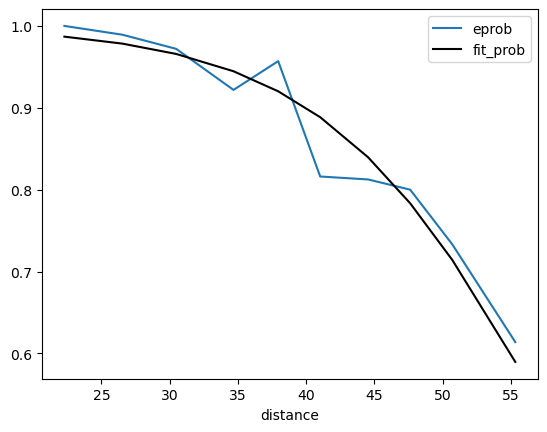

In [60]:
ax = fg_summary.plot(x = 'distance', y = 'eprob')
fg_summary.plot(x = 'distance', y = 'fit_prob',
                color = 'black',
                ax = ax);

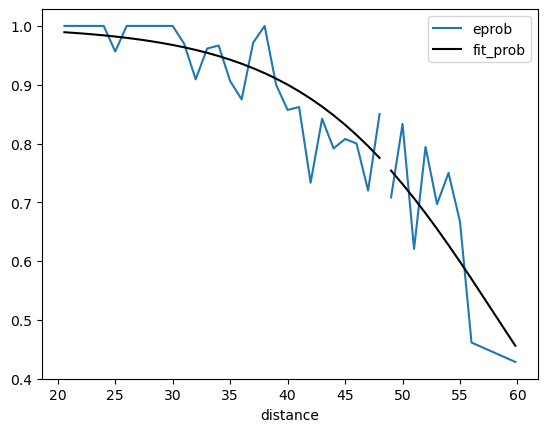

In [86]:
ax = fg_fifty_summary.plot(x = 'distance', y = 'eprob')
fg_fifty_summary.plot(x = 'distance', y = 'fit_prob',
                color = 'black',
                ax = ax);

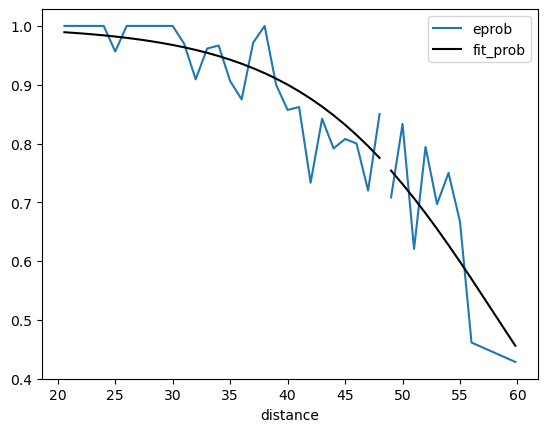

In [88]:
ax = fg_twenty_summary.plot(x = 'distance', y = 'eprob')
fg_twenty_summary.plot(x = 'distance', y = 'fit_prob',
                color = 'black',
                ax = ax);

In [64]:
fg_summary['elogit'] = np.log(fg_summary['eprob'] / (1 - fg_summary['eprob']))
fg_summary['fit_logit'] = np.log(fg_summary['fit_prob'] / (1 - fg_summary['fit_prob']))
fg_summary

,group,distance,eprob,fit_prob,elogit,fit_logit
0,"(18.999, 24.0]",22.283333,1.000000,0.986900,inf,4.321994
1,"(24.0, 28.0]",26.537634,0.989247,0.978375,4.521789,3.812056
2,"(28.0, 32.0]",30.476636,0.971963,0.965773,3.545779,3.339911
3,"(32.0, 36.0]",34.671875,0.921875,0.944645,2.468100,2.837052
4,"(36.0, 39.0]",37.946237,0.956989,0.920164,3.102342,2.444573
5,"(39.0, 42.0]",41.022989,0.816092,0.888527,1.490091,2.075781
6,"(42.0, 46.0]",44.531250,0.812500,0.839601,1.466337,1.655266
7,"(46.0, 48.8]",47.615385,0.800000,0.783400,1.386294,1.285588
8,"(48.8, 52.0]",50.695238,0.733333,0.714313,1.011601,0.916424
9,"(52.0, 68.0]",55.316832,0.613861,0.589636,0.463573,0.362460


In [66]:
fg_fifty_summary['elogit'] = np.log(fg_fifty_summary['eprob'] / (1 - fg_fifty_summary['eprob']))
fg_fifty_summary['fit_logit'] = np.log(fg_fifty_summary['fit_prob'] / (1 - fg_fifty_summary['fit_prob']))
fg_fifty_summary

,group,distance,eprob,fit_prob,elogit,fit_logit
0,"(18.999, 21.0]",20.578947,1.000000,0.989295,inf,4.526289
1,"(21.0, 22.0]",22.000000,1.000000,0.987332,inf,4.355956
2,"(22.0, 23.0]",23.000000,1.000000,0.985742,inf,4.236092
3,"(23.0, 24.0]",24.000000,1.000000,0.983956,inf,4.116227
4,"(24.0, 25.0]",25.000000,0.956522,0.981949,3.091042,3.996363
5,"(25.0, 26.0]",26.000000,1.000000,0.979697,inf,3.876499
6,"(26.0, 27.0]",27.000000,1.000000,0.977171,inf,3.756635
7,"(27.0, 28.0]",28.000000,1.000000,0.974339,inf,3.636771
8,"(28.0, 29.0]",29.000000,1.000000,0.971165,inf,3.516906
9,"(29.0, 30.0]",30.000000,1.000000,0.967612,inf,3.397042


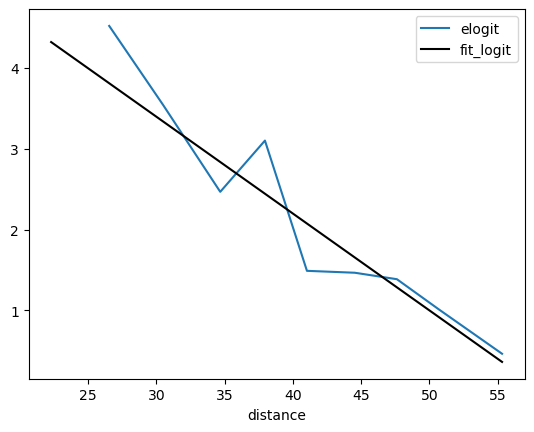

In [68]:
ax = fg_summary.plot(x = 'distance', y = 'elogit')
fg_summary.plot(x = 'distance', y = 'fit_logit',
                color = 'black',
                ax = ax);

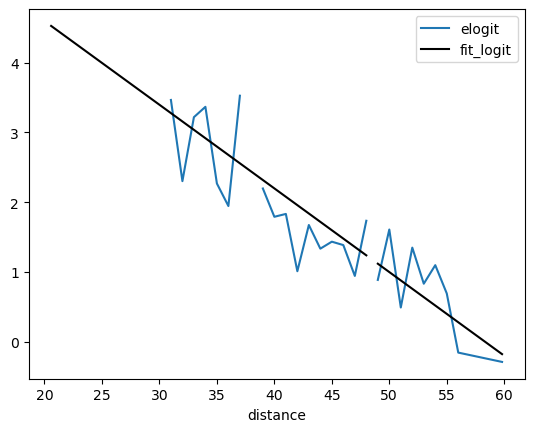

In [70]:
ax = fg_fifty_summary.plot(x = 'distance', y = 'elogit')
fg_fifty_summary.plot(x = 'distance', y = 'fit_logit',
                color = 'black',
                ax = ax);